# Lithium Niobate Mach-Zehnder Interferometer

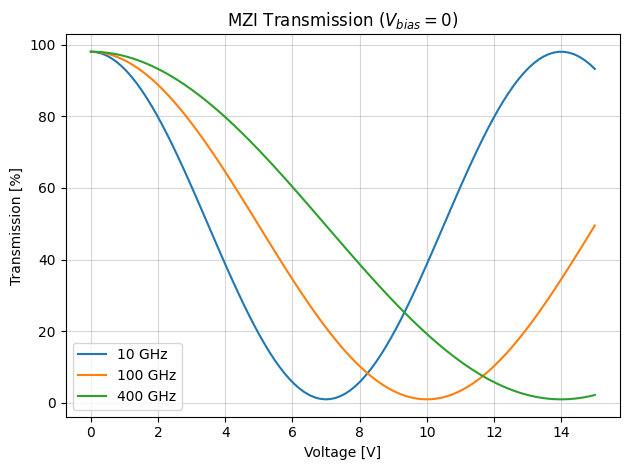

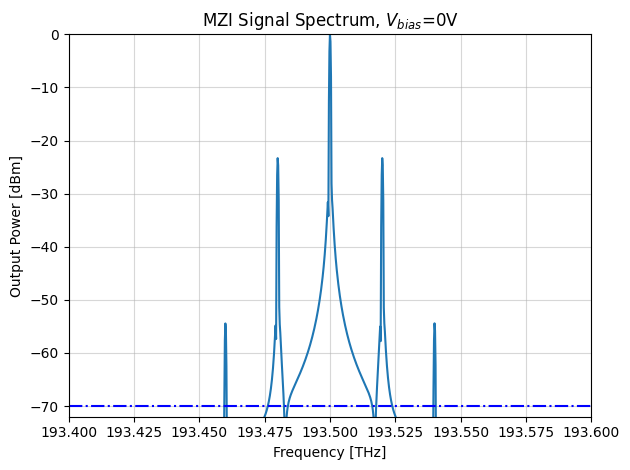

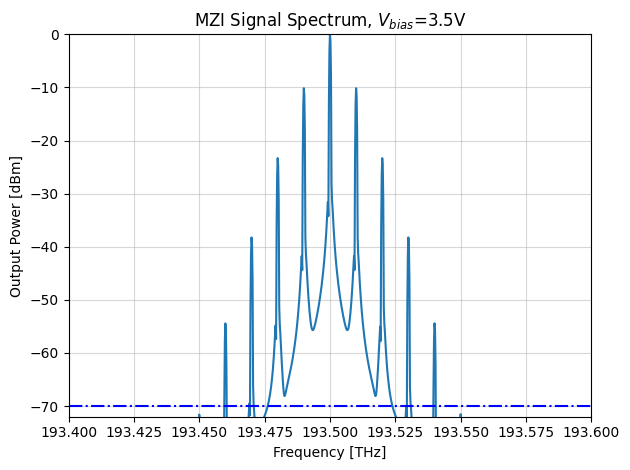

In [1]:
# For relative imports
import os, sys
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import numpy as np
from phase_modulation import modulation, carrier, mod_index, spectrum
import matplotlib.pyplot as plt
from scipy.fftpack import fftshift
from mzi import ideal_mzi_v

# Half wave voltages
v_p = [(10e9, 7), (100e9, 10), (400e9, 14)]

wg_len = 6  # [mm]
f_mod = 0.01  # [THz]
e_mod = 1e5
f_car = 193.5

# Plot MZI transmission vs. voltage for different modulation frequencies
fig, ax = plt.subplots()
v = np.linspace(0, 15, 100)
for f_mod, v_i in v_p:
    ax.plot(v, ideal_mzi_v(v, v_i), label="{:d} GHz".format(int(f_mod * 1e-9)))
ax.set_title(r"MZI Transmission ($V_{bias}=0$)")
ax.set_ylabel("Transmission [%]")
ax.set_xlabel("Voltage [V]")
ax.legend()
ax.grid(which="major", alpha=0.5)
plt.tight_layout()

# Plot sideband spectrum for V=0V
N = int(5e6)  # Number of samples
T = 5000.0 / N  # Sample period
f_mod = 0.01  # [THz]
time = np.linspace(0, N * T, N)
mod_1 = modulation(f_mod, time)
mod_2 = -mod_1

d_mod = mod_index(f_mod, e_mod, wg_len)
car_1 = carrier(f_car, time, d_mod, mod_1)
car_2 = carrier(f_car, time, d_mod, mod_2)
signal = 1 / np.sqrt(2) * car_1 + 1 / np.sqrt(2) * car_2
xf, yf = spectrum(signal, N, T)

fig, ax0 = plt.subplots()
ax0.plot(fftshift(xf), 10 * np.log10(fftshift(np.abs(yf) / np.max(np.abs(yf)))))
ax0.set_title(r"MZI Signal Spectrum, $V_{bias}$=0V")
ax0.set_xlim(193.5 - 0.1, 193.5 + 0.1)
ax0.set_xlabel("Frequency [THz]")
ax0.set_ylabel("Output Power [dBm]")
ax0.axhline(-70, color="b", linestyle="-.")
ax0.set_ylim((-72, 0))
ax0.grid(which="major", alpha=0.5)
plt.tight_layout()

# Plot sideband spectrum for V=3.5V
d_mod = mod_index(f_mod, e_mod, wg_len)
car_1 = carrier(f_car, time, d_mod, mod_1, np.pi / 4)
car_2 = carrier(f_car, time, d_mod, mod_2, -np.pi / 4)
signal = 1 / np.sqrt(2) * car_1 + 1 / np.sqrt(2) * car_2
xf, yf = spectrum(signal, N, T)

fig, ax0 = plt.subplots()
ax0.plot(fftshift(xf), 10 * np.log10(fftshift(np.abs(yf) / np.max(np.abs(yf)))))
ax0.set_title(r"MZI Signal Spectrum, $V_{bias}$=3.5V")
ax0.set_xlim(193.5 - 0.1, 193.5 + 0.1)
ax0.set_xlabel("Frequency [THz]")
ax0.set_ylabel("Output Power [dBm]")
ax0.axhline(-70, color="b", linestyle="-.")
ax0.set_ylim((-72, 0))
ax0.grid(which="major", alpha=0.5)
plt.tight_layout()

plt.show()